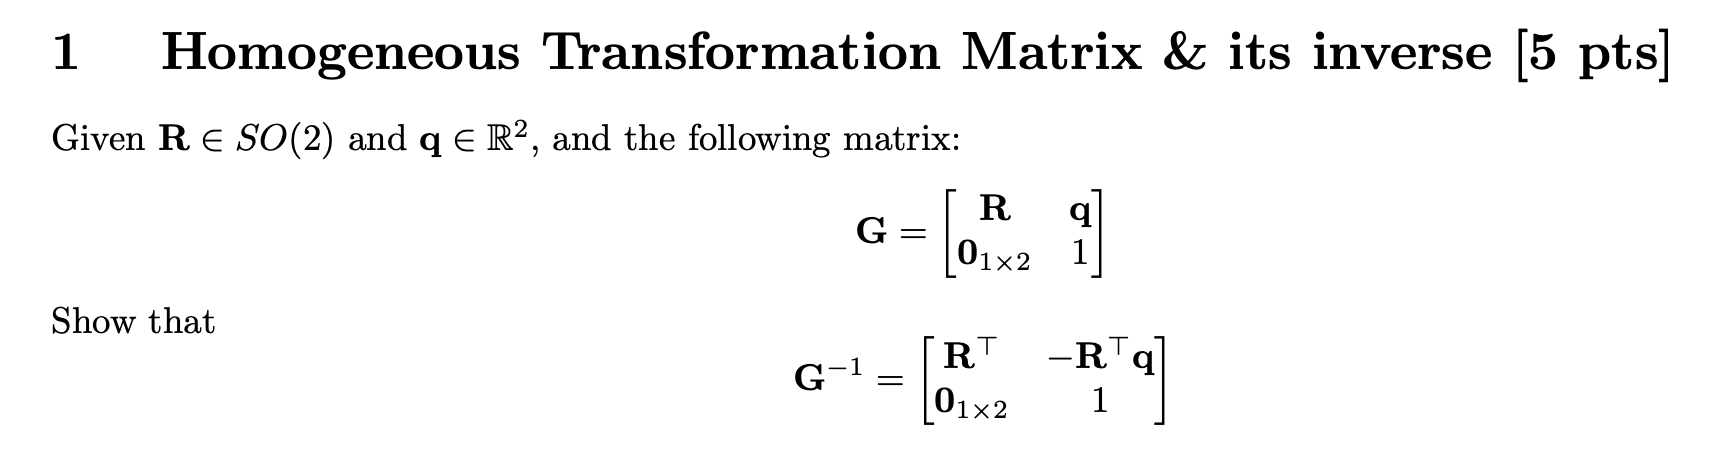

In [12]:
import numpy as np
from numpy import cos, sin, pi

# Example rotation matrix
theta = np.radians(30)
R = np.array([[cos(theta), -cos(theta)], 
              [cos(theta),  cos(theta)]])

# Example translation vector
q = np.array([[1], [2]])

# Define G
G = np.block([[R, q], [np.zeros((1, 2)), np.array([[1]])]])

# Construct the supposed inverse of G
R_T = R.T
q_inv = -np.dot(R_T, q)
G_inv = np.block([[R_T, q_inv], [np.zeros((1, 2)), np.array([[1]])]])

# Test if it is really an inverse
res = G @ G_inv
print(res)

[[ 1.00000000e+00 -7.43708407e-18 -2.22044605e-16]
 [-7.43708407e-18  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


* ^ Rounds down to a 3x3 identity matrix which implies that G_inv is the inverse of G

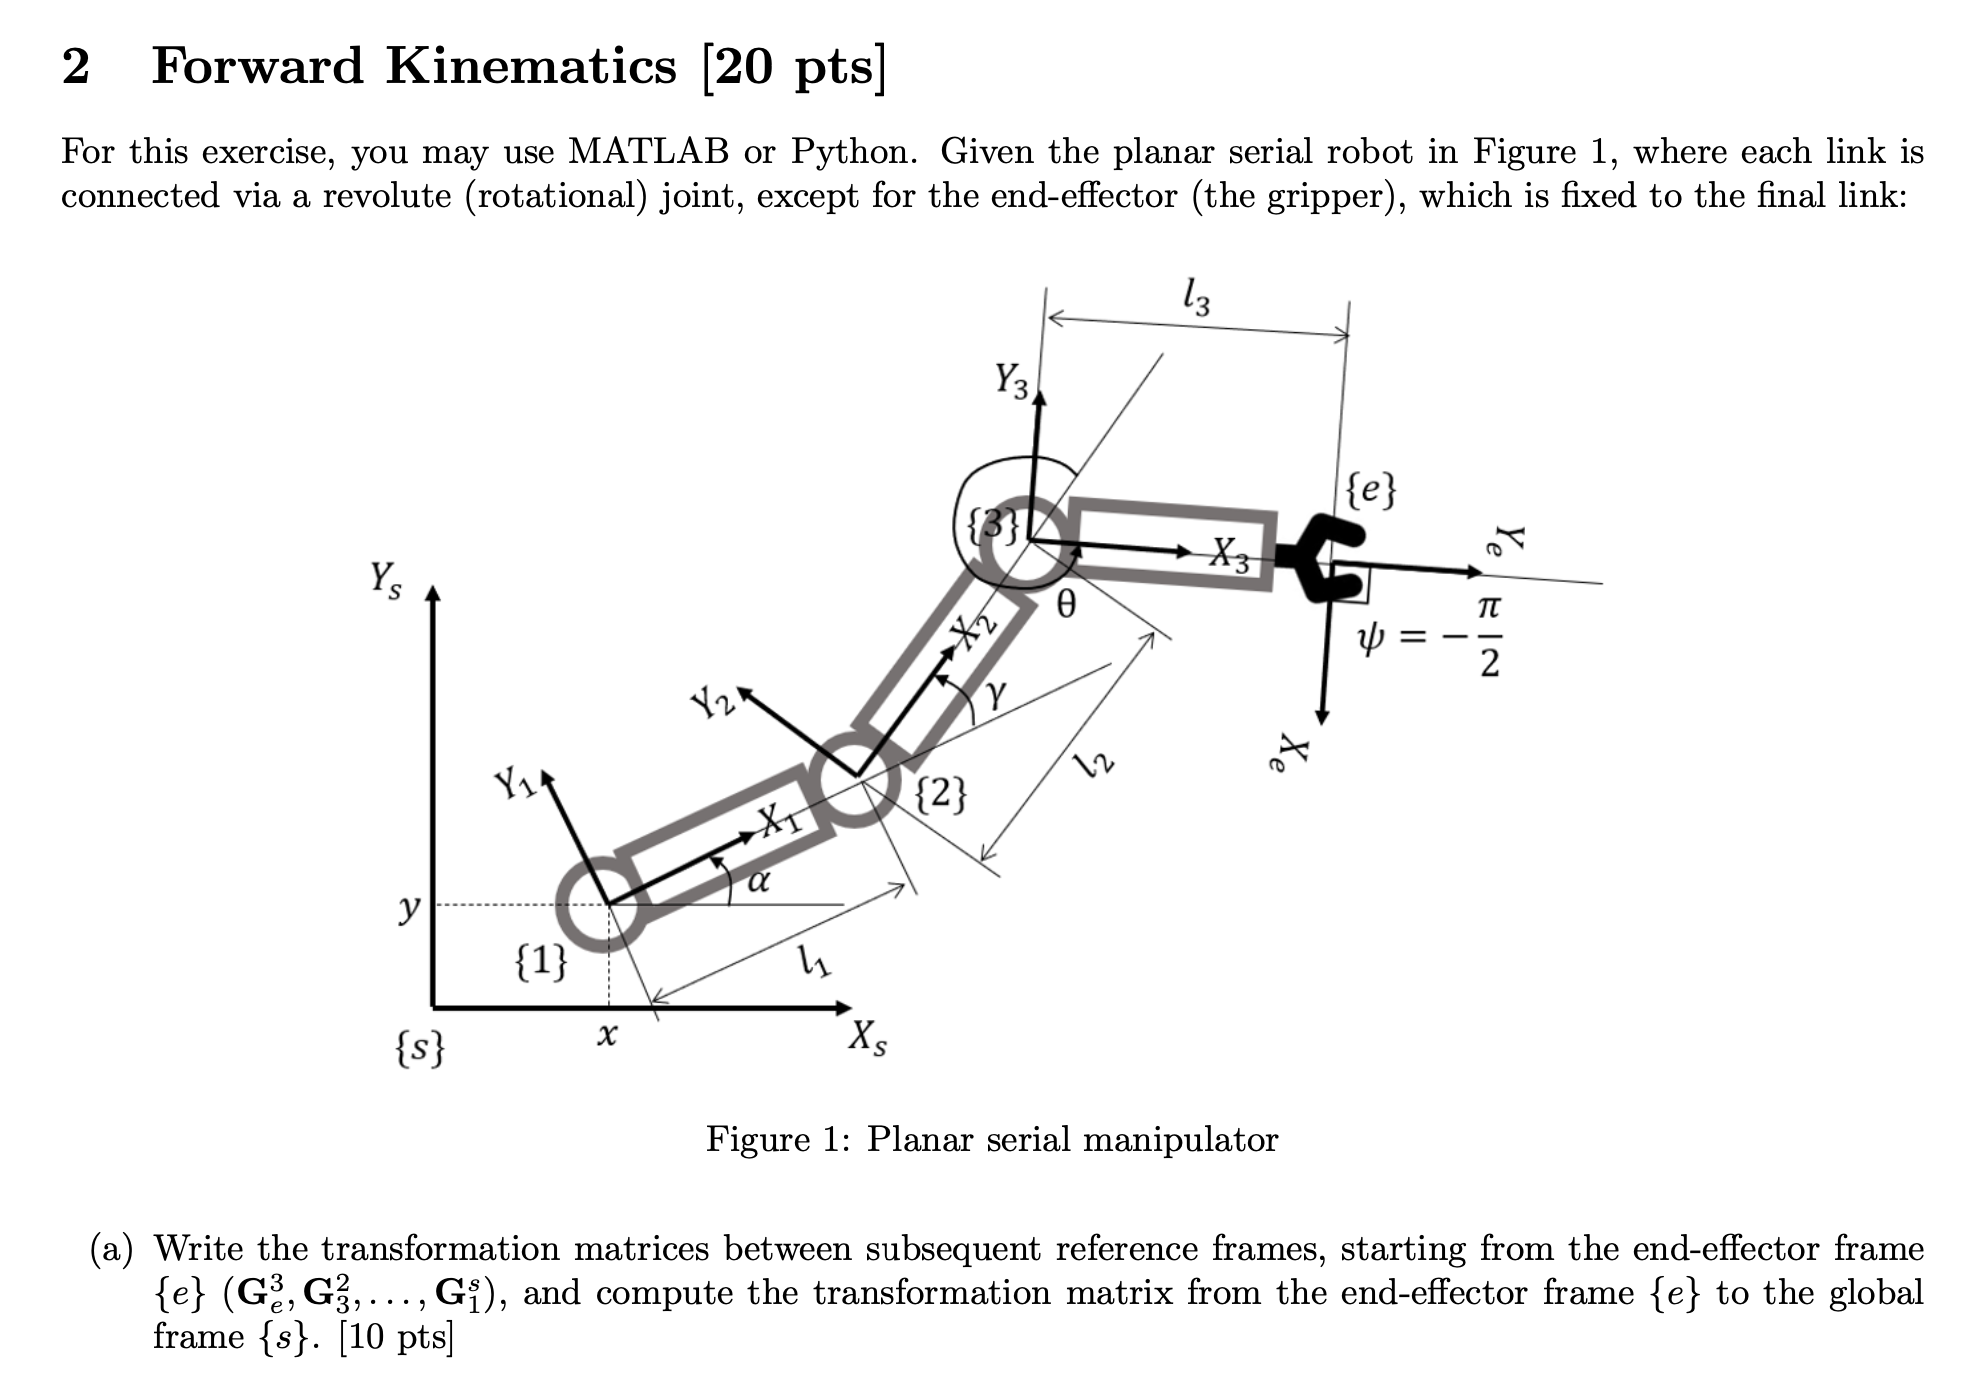

In [155]:
# Helper to compute R matrices
def getRotationMatrix(radAngle):
    return np.array([[cos(radAngle), -sin(radAngle)],
                     [sin(radAngle), cos(radAngle)]])

# Rotation matrices
psi = -pi/2
R_e_3 = getRotationMatrix(psi)

theta = -pi/3
R_3_2 = getRotationMatrix(theta)

gamma = pi/4
R_2_1 = getRotationMatrix(gamma)

alpha = pi/4
R_1_s = getRotationMatrix(alpha)

# Translation vecotrs
l3 = 1
q_e_3 = np.array([[l3], 
                  [0]])

l2 = 1
q_3_2 = np.array([[l2], 
                  [0]])

l1 = 1
q_2_1 = np.array([[l1], 
                  [0]])

x, y = 1, 1
q_1_s = np.array([[x], 
                  [y]])

In [177]:
# Helper to construct G matrices
def getTransMatrix(R, q):
    return np.block([[R, q], [np.zeros((1, 2)), np.array([[1]])]])

G_e_3 = getTransMatrix(R_e_3, q_e_3)
G_3_2 = getTransMatrix(R_3_2, q_3_2)
G_2_1 = getTransMatrix(R_2_1, q_2_1)
G_1_s = getTransMatrix(R_1_s, q_1_s)

# Print em out
print("Transformation from e -> 3:")
print(f"{G_e_3}\n")
print("Transformation from 3 -> 2:")
print(f"{G_3_2}\n")
print("Transformation from 2 -> 1:")
print(f"{G_2_1}\n")
print("Transformation from 1 -> s:")
print(f"{G_1_s}\n")

Transformation from e -> 3:
[[ 6.123234e-17  1.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

Transformation from 3 -> 2:
[[ 0.5        0.8660254  1.       ]
 [-0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]

Transformation from 2 -> 1:
[[ 0.70710678 -0.70710678  1.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Transformation from 1 -> s:
[[ 0.70710678 -0.70710678  1.        ]
 [ 0.70710678  0.70710678  1.        ]
 [ 0.          0.          1.        ]]



In [178]:
# Compose G matrices to get transformation from e to s
G_e_s = (G_1_s @ (G_2_1 @ (G_3_2 @ G_e_3)))
print("Transformation from e -> s:")
print(f"{G_e_s}")

Transformation from e -> s:
[[ 0.5         0.8660254   2.57313218]
 [-0.8660254   0.5         3.20710678]
 [ 0.          0.          1.        ]]


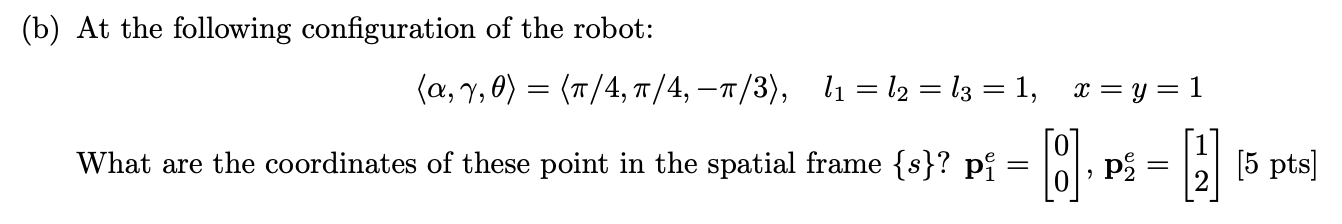

In [180]:
# Points in e
p_1_e = np.array([[0],
                  [0],
                  [1]])
p_2_e = np.array([[1],
                  [2],
                  [1]])

# Convert to s using our G matrix
p_1_s = G_e_s @ p_1_e
# Remove the extra dimension
p_1_s = p_1_s[:2, :]

p_2_s = G_e_s @ p_2_e
p_2_s = p_2_s[:2, :]

# Print em out
print("Point 1 in spatial frame:")
print(f"{p_1_s}\n")
print("Point 2 in spatial frame:")
print(f"{p_2_s}\n")

Point 1 in spatial frame:
[[2.57313218]
 [3.20710678]]

Point 2 in spatial frame:
[[4.80518299]
 [3.34108138]]



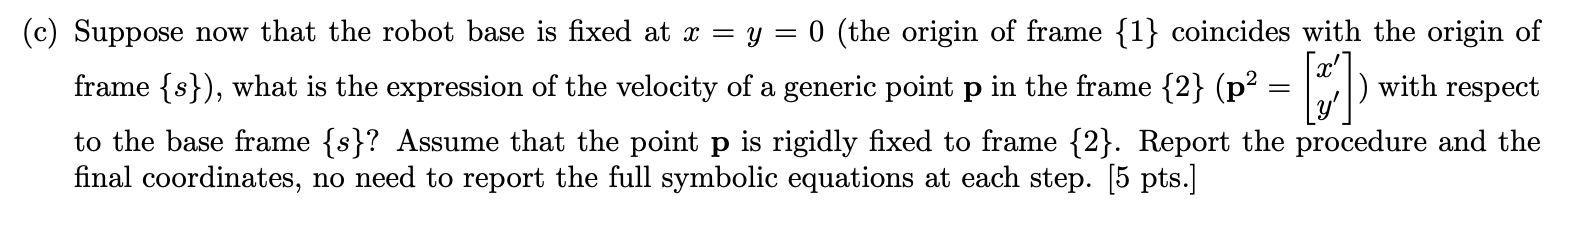

Procedure:
1. Compose velocity tranformation matrix from intermediate transformation matrices
2. Compute intermediate transformation matrices from rotational matrices, translational vectors and link anglular velocities
3. Compute velocity of point in base frame from point in frame 2

Expression
* Rotational matrices and translation vectores are known from a), b)
* Angular velocities are unknown

!!!!!! add sc !!!!!!!!!

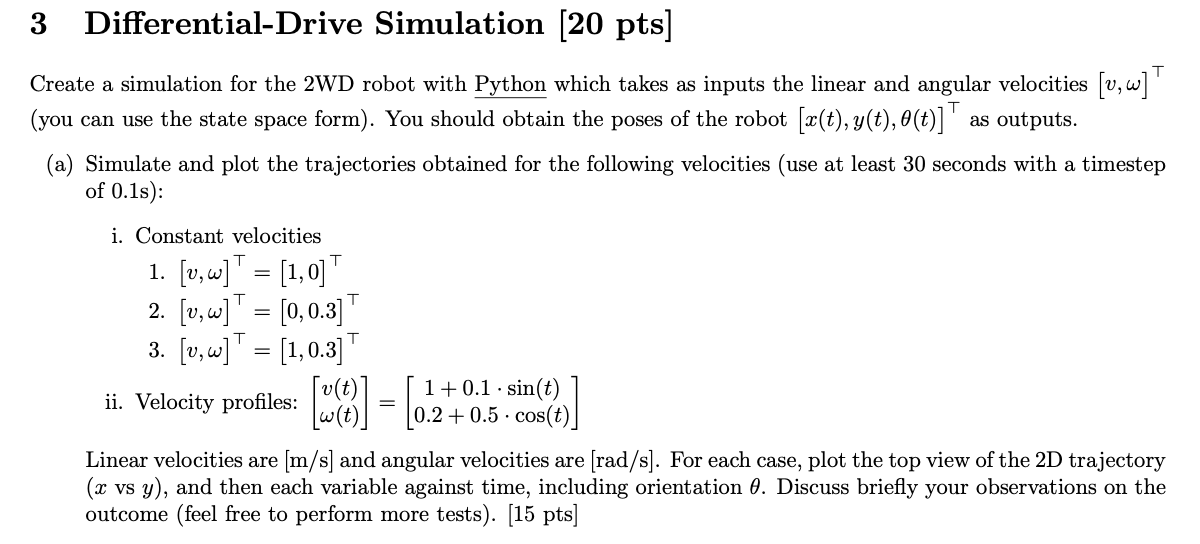

In [69]:
# Create time steps to calc from
dt = 0.1
time = np.arange(0, 30, dt)

def computeTraj(v, omega, time):
    # Init conditions
    x = 0.0
    y = 0.0
    theta = 0.0
    x_traj = [x]
    y_traj = [y]
    theta_traj = [theta]
    
    for t in time:
        # From slides
        x += v * cos(theta) * dt
        y += v * sin(theta) * dt
        theta += omega * dt
        
        x_traj.append(x)
        y_traj.append(y)
        theta_traj.append(theta)
    
    return x_traj, y_traj, theta_traj

In [76]:
# i Constant velocities
# 1. 
x_1, y_1, theta_1 = computeTraj(1, 0, time)

# 2.
x_2, y_2, theta_2 = computeTraj(0, 0.3, time)

# 3.
x_3, y_3, theta_3 = computeTraj(1, 0.3, time)

In [78]:
import matplotlib.pyplot as plt

# Helper function to plot trajectories
def plotTrajectory(x_traj, y_traj, theta_traj, time):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.plot(x_traj, y_traj)
    plt.title("2D Trajectory (x vs y)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(time, x_traj[:-1])
    plt.title("x vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("x (m)")
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(time, y_traj[:-1])
    plt.title("y vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("y (m)")
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(time, theta_traj[:-1])
    plt.title("Theta vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Theta (rad)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Constant velocity case 1:


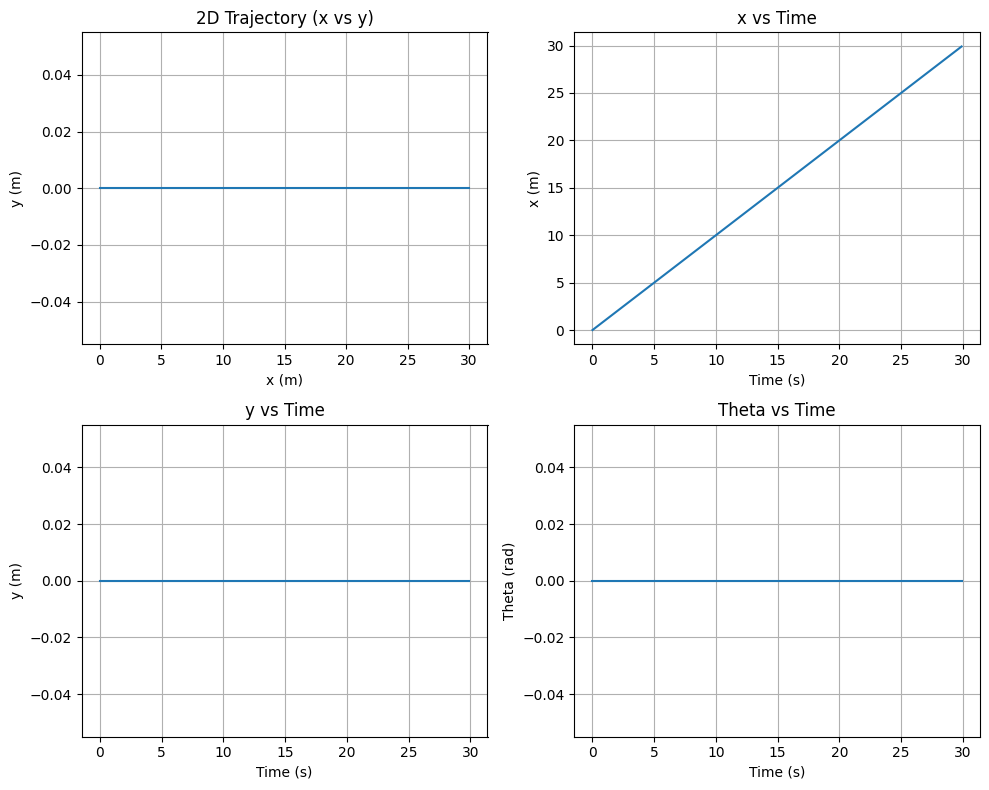

In [181]:
print("Constant velocity case 1:")
plotTrajectory(x_1, y_1, theta_1, time)

Constant velocity case 2:


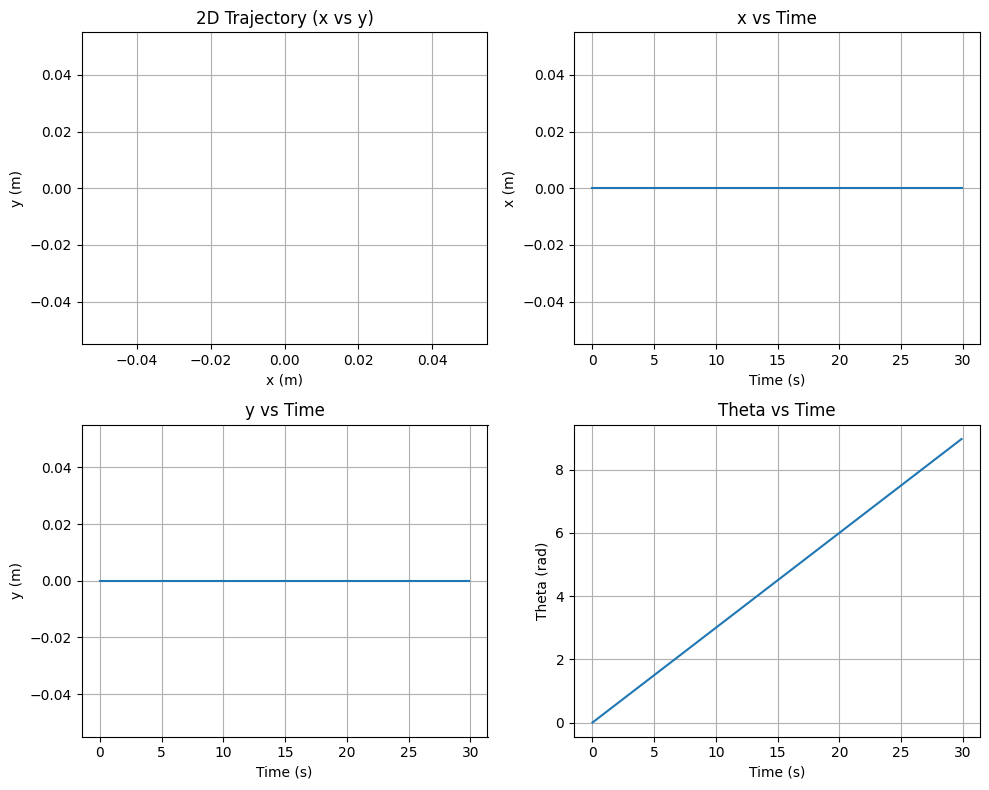

In [184]:
print("Constant velocity case 2:")
plotTrajectory(x_2, y_2, theta_2, time)

Constant velocity case 3:


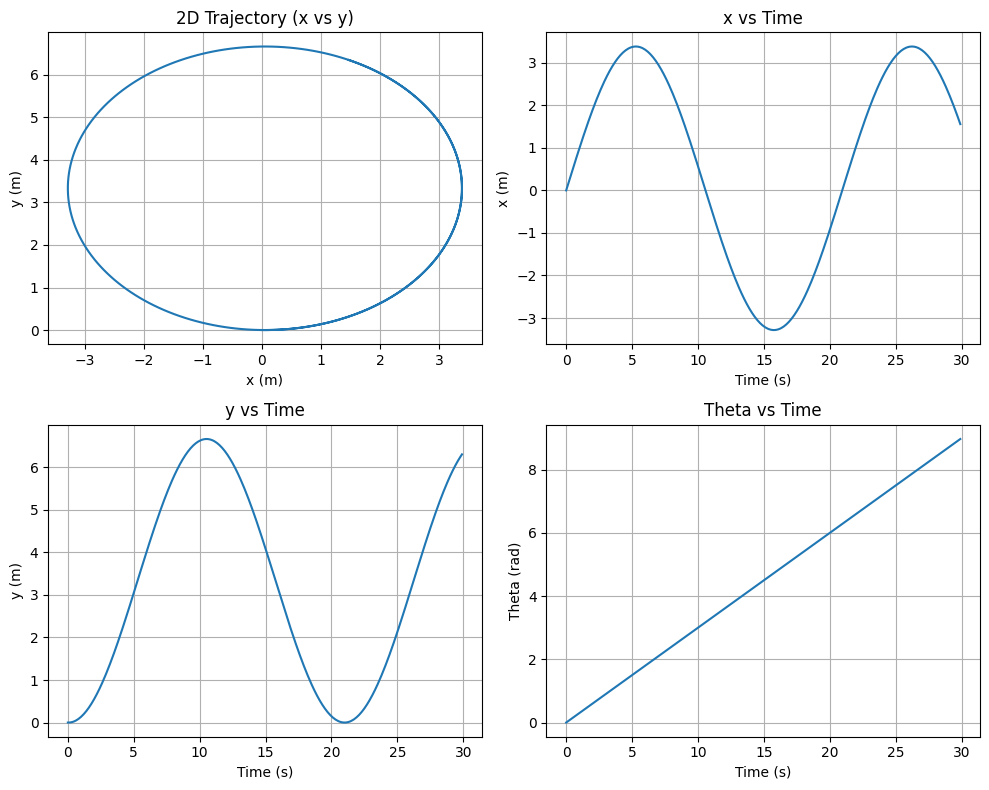

In [183]:
print("Constant velocity case 3:")
plotTrajectory(x_3, y_3, theta_3, time)

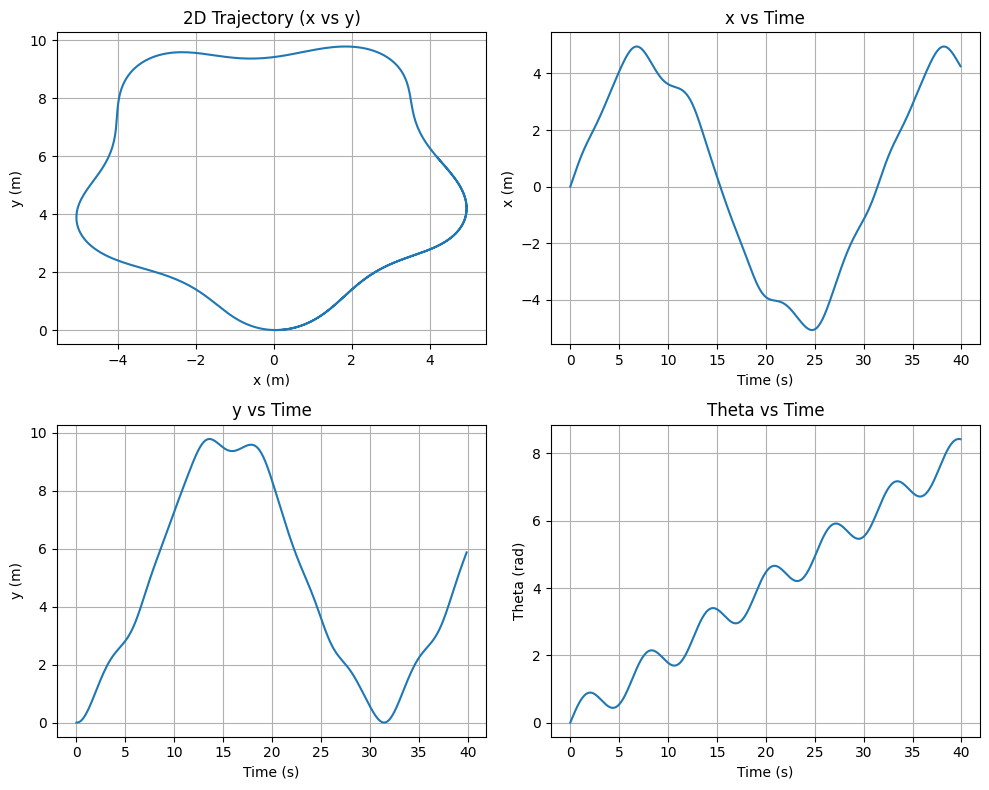

In [185]:
# ii. Velocity profiles

x = 0.0
y = 0.0
theta = 0.0
time = np.arange(0, 40, dt)

x_prof = [x]
y_prof = [y]
theta_prof = [theta]

for t in time:
    # Now we need to compute v and omega at each timestep, otherwise the same process
    v = 1 + 0.1*sin(t)
    omega = 0.2 + 0.5*cos(t)
    x += v * cos(theta) * dt
    y += v * sin(theta) * dt
    theta += omega * dt
    
    x_prof.append(x)
    y_prof.append(y)
    theta_prof.append(theta)

plotTrajectory(x_prof, y_prof, theta_prof, time)

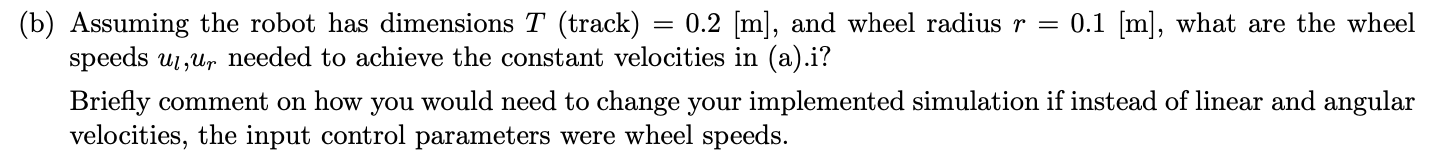

In [188]:
# Given
track = 0.2
r = 0.1

def calcWheelSpeeds(v, omega, track, r):
    # From the slides
    ur = (v + (track * omega / 2)) / r
    ul = (v - (track * omega / 2)) / r

    return ul, ur

print(f"Velocity vector [1, 0]^T   -- (ul, ur) = {calcWheelSpeeds(1, 0, track, r)}")
print(f"Velocity vector [0, 0.3]^T -- (ul, ur) = {calcWheelSpeeds(0, 0.3, track, r)}")
print(f"Velocity vector [1, 0.3]^T -- (ul, ur) = {calcWheelSpeeds(1, 0.3, track, r)}")

Velocity vector [1, 0]^T   -- (ul, ur) = (10.0, 10.0)
Velocity vector [0, 0.3]^T -- (ul, ur) = (-0.3, 0.3)
Velocity vector [1, 0.3]^T -- (ul, ur) = (9.7, 10.299999999999999)


Changes to solution in a) if inputs were wheelspeeds:
* Would compute velocities from wheelspeeds
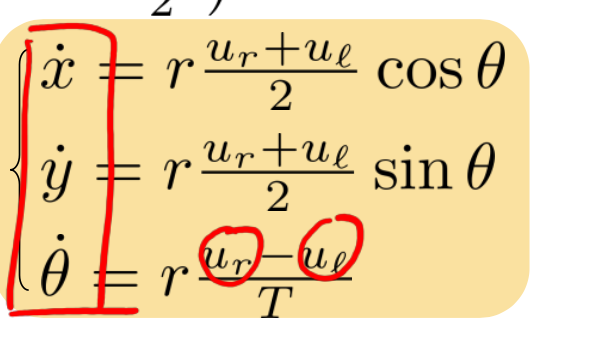
* Would need track width to compute angular velocity

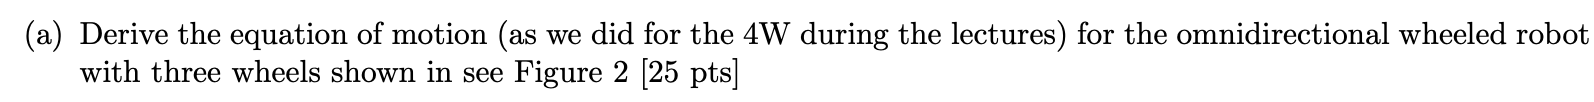
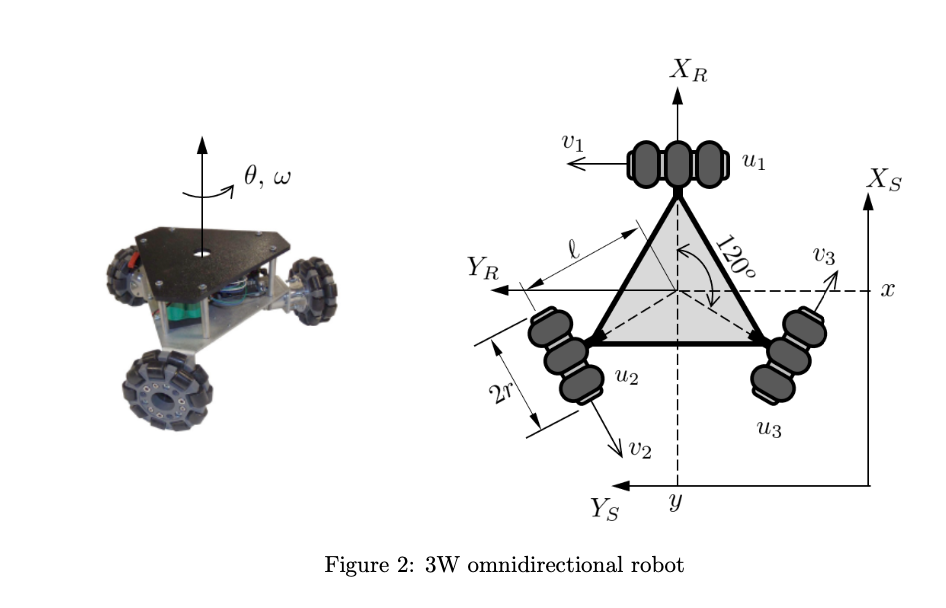

!!!!!!!!! add derivation !!!!!!!!!!!!!!!!!!

In [156]:
# G derived by hand, this is just a helper to get G at each theta
def getG(theta):
    r = 0.1
    l = 0.25

    return (1/r) * np.array([   [cos(theta + pi/2),     sin(theta + pi/2),       l], 
                                [cos(theta + 7*pi/6),   sin(theta + 7*pi/6),     l], 
                                [cos(theta + 11*pi/6),  sin(theta + 11*pi/6),    l]])

theta = 0.0
# Double check the rank
G = getG(theta)

print(f"Rank(G): {np.linalg.matrix_rank(G)}")

Rank(G): 3


The rank of the G matrix is 3, so it is properly constructed.

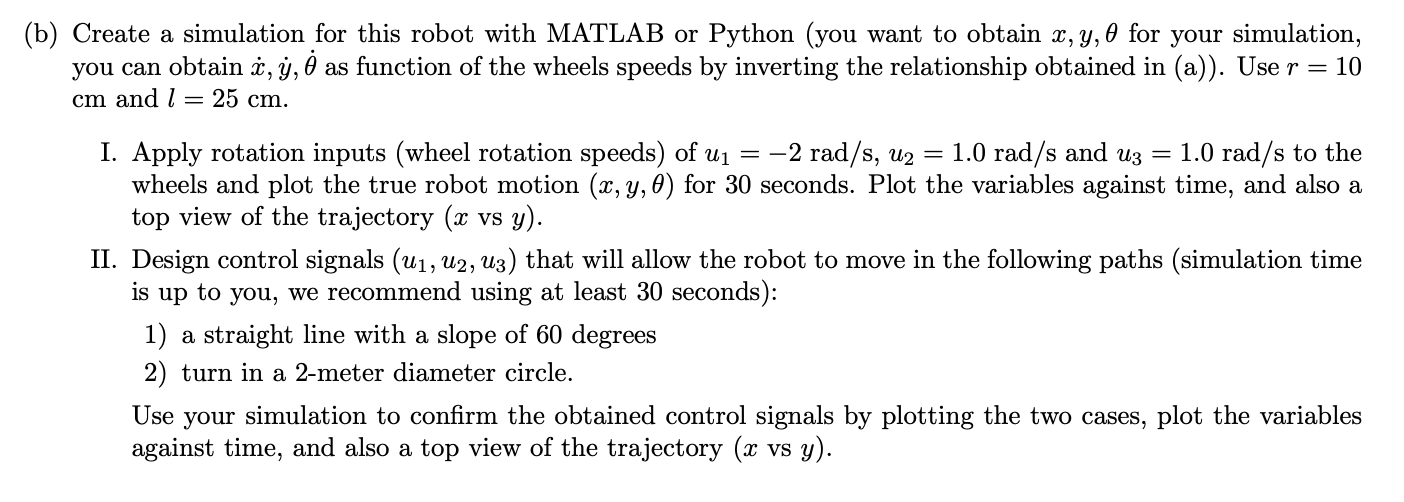

In [157]:
dt = 0.1
time = np.arange(0, 30, dt)

def computeHoloTraj(u, time):
    # Init conditions
    x = 0.0
    y = 0.0
    theta = 0.0

    x_traj = [x]
    y_traj = [y]
    theta_traj = [theta]
    
    for t in time:
        # Compute G
        G = getG(theta)
        
        q_dot = np.linalg.inv(G) @ u
        
        x += q_dot[0][0] * dt
        y += q_dot[1][0] * dt
        theta += q_dot[2][0] * dt
        
        x_traj.append(x)
        y_traj.append(y)
        theta_traj.append(theta)
    
    return x_traj, y_traj, theta_traj

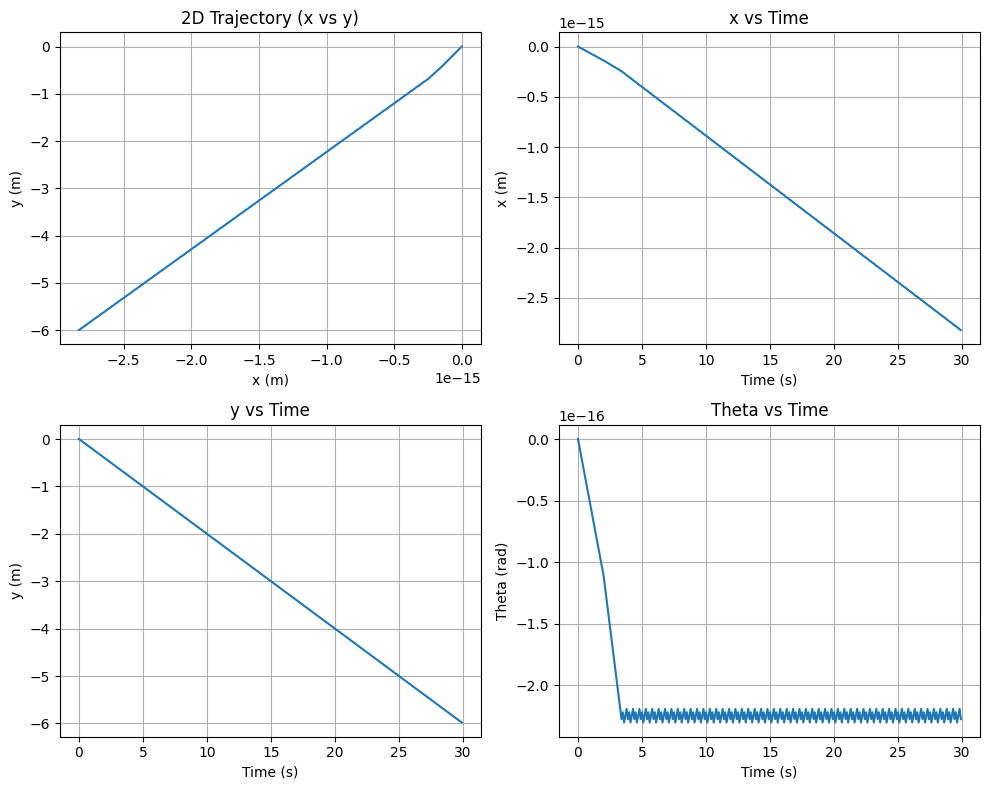

In [164]:
# I
u = np.array([[-2],
              [1],
              [1]])
x_I, y_I, theta_I = computeHoloTraj(u, time)
plotTrajectory(x_I, y_I, theta_I, time)

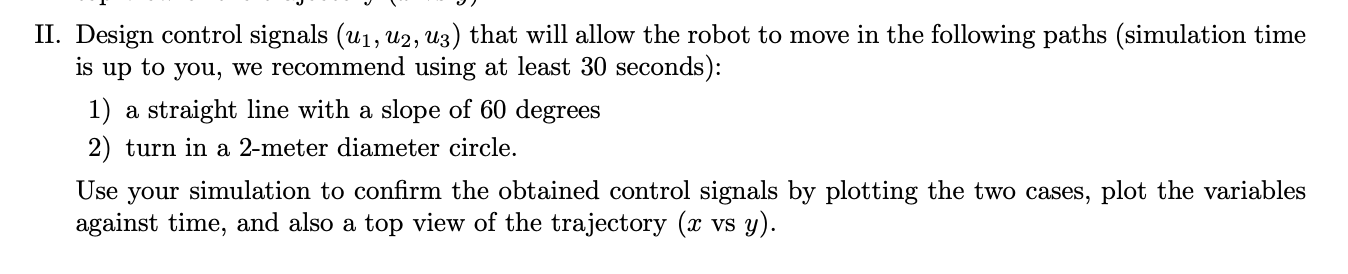

!!! derivation !!!

Required control signals [u1 u2 u3]: [ 8.66025404e+00 -8.66025404e+00 -4.06796998e-15]


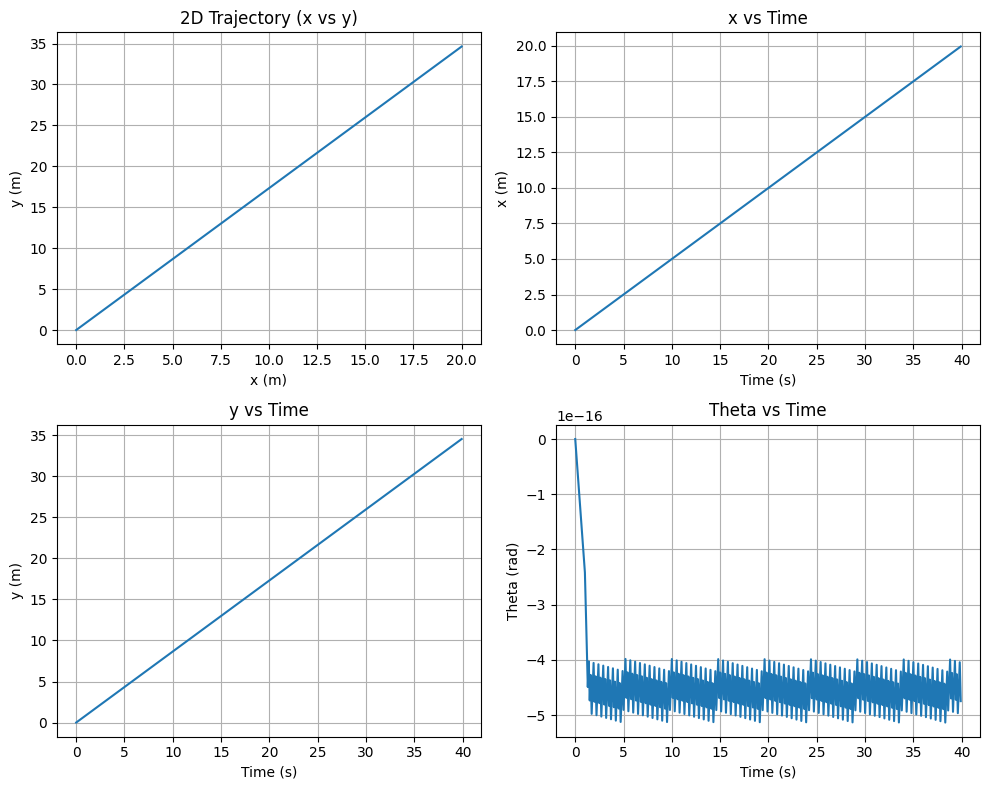

In [189]:
#II 1.
theta = 0.0
# Desired velocity vector
q_dot = np.array([  [cos(pi/3)],
                    [sin(pi/3)],
                    [0.0]])
G = getG(theta)
u = G @ q_dot
print(f"Required control signals [u1 u2 u3]: {u.T[0]}")
x_II, y_II, theta_II = computeHoloTraj(u, time)
plotTrajectory(x_II, y_II, theta_II, time)

!!!! derivation !!!!

Required control signals [u1 u2 u3]: [ 2.5        -6.16025404 11.16025404]


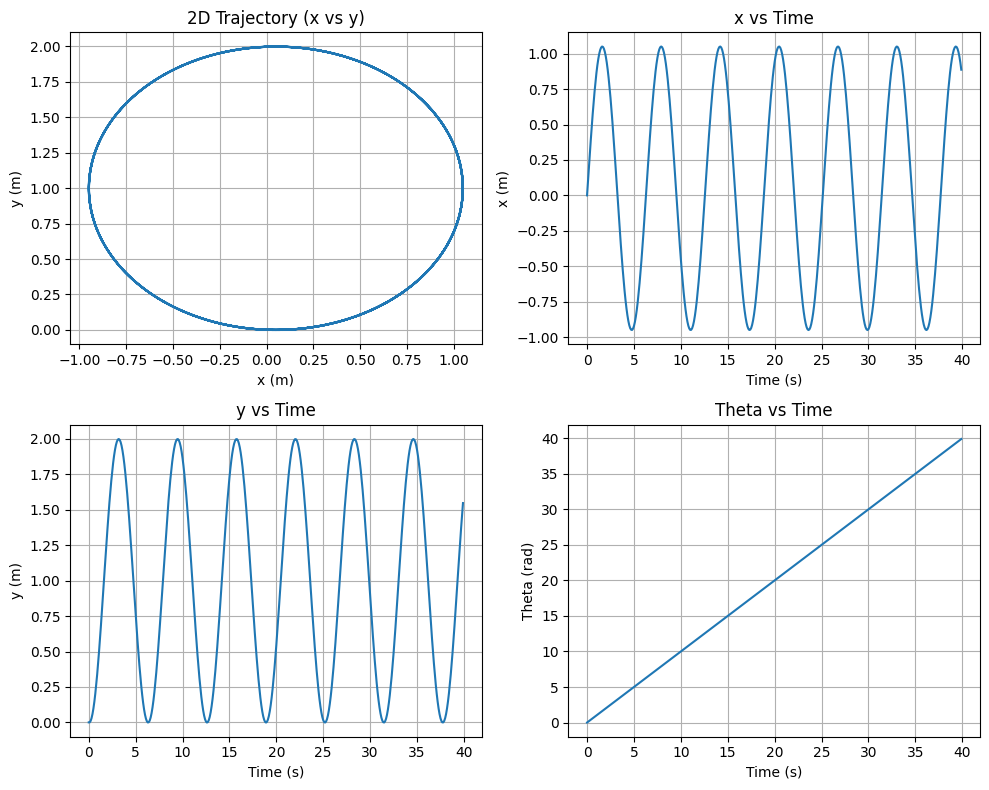

In [192]:
#II 2.
theta = pi/4
# Desired velocity vector
q_dot = np.array([  [1/np.sqrt(2)],
                    [1/np.sqrt(2)],
                    [1]])
G = getG(theta)
u = G @ q_dot
print(f"Required control signals [u1 u2 u3]: {u.T[0]}")
x_II, y_II, theta_II = computeHoloTraj(u, time)
plotTrajectory(x_II, y_II, theta_II, time)